<a href="https://colab.research.google.com/github/mishratushar/CIFAR10/blob/master/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Folder_name = 'cs231n/assignment2/'

import sys
sys.path.append('/content/drive/My Drive/{}'.format(Folder_name))

# %cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# !bash get_datasets.sh
# %cd /content1

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import PIL

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Num_Train = 49000

transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])

cifar10_train = dset.CIFAR10('./cs231n/datasets', train = True, transform = transform, download = True)
loader_train = DataLoader(cifar10_train, batch_size = 128, sampler = sampler.SubsetRandomSampler(range(Num_Train)))

cifar10_val = dset.CIFAR10('./cs231n/datasets', train=True, download=True, transform=transform)
loader_val = DataLoader(cifar10_val, batch_size = 128, sampler=sampler.SubsetRandomSampler(range(Num_Train, 50000)))

cifar10_test = dset.CIFAR10('./cs231n/datasets', train=False, download=True, transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=128)

Extracting ./cs231n/datasets/cifar-10-python.tar.gz to ./cs231n/datasets
Files already downloaded and verified
Files already downloaded and verified


In [ ]:

USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [ ]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)

class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

In [ ]:
def check(loader, model, verbose = True):
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        i = 0
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            i += 1
            if(i%30 == 0 and verbose):
              break
        acc = float(num_correct) / num_samples
        print('Got %d correct out of %d' %(num_correct, num_samples))
        return(acc)

In [ ]:
import torch.nn.functional as F
def train(model, optimizer, epochs = 1, print_every = 100):
  loss_hist = []
  val = []
  train_accuracy = []
  j = 0
  model = model.to(device = device)
  i = 0
  best_val = 0
  for e in range(epochs):
    for (x,y) in (loader_train):
      model.train()
      x = x.to(device=device, dtype=dtype)
      y = y.to(device=device, dtype=torch.long)

      scores = model(x)
      loss = F.cross_entropy(scores, y)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()


      if(i % print_every == 0):
        print('iteration : %d, loss : %0.4f' % (i,loss.item()))
        val_acc, train_acc = check(loader_val, model), check(loader_train, model)
        val.append(val_acc)
        train_accuracy.append(train_acc)
        j += 1
        if(best_val < val_acc):
          best_val = val_acc
        print('Validation Accuracy : %0.2f, Training Accuracy : %0.2f' %(100*val_acc, 100*train_acc))
        print()


      loss_hist.append(loss.item())
      i += 1     

  iterations = np.arange(0, i)
  plt.figure()
  plt.plot(iterations, loss_hist, '.')
  plt.ylim(0, 2.5)
  plt.xlabel("iterations")
  plt.ylabel("loss")
  plt.show()

  plt.figure()
  y = np.arange(0, j)
  plt.plot(y, train_accuracy, '-o')
  plt.plot(y, val, '-o')
  plt.legend(['train', 'val'], loc='upper left')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()
  print('Best Validation Accuracy Achieved %0.2f' %(100*best_val))

iteration : 0, loss : 2.3035
Got 113 correct out of 1000
Got 385 correct out of 3840
Validation Accuracy : 11.30, Training Accuracy : 10.03

iteration : 100, loss : 2.2992
Got 115 correct out of 1000
Got 372 correct out of 3840
Validation Accuracy : 11.50, Training Accuracy : 9.69

iteration : 200, loss : 2.3020
Got 125 correct out of 1000
Got 446 correct out of 3840
Validation Accuracy : 12.50, Training Accuracy : 11.61

iteration : 300, loss : 2.3001
Got 137 correct out of 1000
Got 524 correct out of 3840
Validation Accuracy : 13.70, Training Accuracy : 13.65

iteration : 400, loss : 2.2965
Got 139 correct out of 1000
Got 479 correct out of 3840
Validation Accuracy : 13.90, Training Accuracy : 12.47

iteration : 500, loss : 2.1429
Got 235 correct out of 1000
Got 937 correct out of 3840
Validation Accuracy : 23.50, Training Accuracy : 24.40

iteration : 600, loss : 2.0603
Got 293 correct out of 1000
Got 1105 correct out of 3840
Validation Accuracy : 29.30, Training Accuracy : 28.78

i

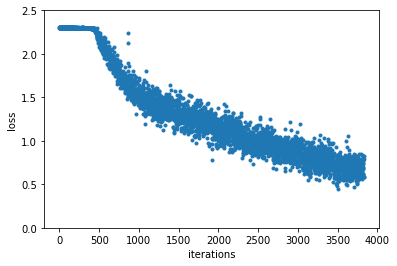

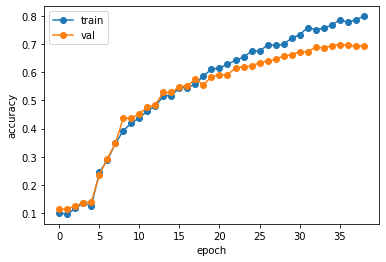

Best Validation Accuracy Achieved 69.80


In [ ]:
channel_1 = 16
channel_2 = 16
channel_3 = 64
channel_4 = 64
channel_5 = 128
channel_6 = 128

model1 = nn.Sequential(nn.Conv2d(3, channel_1, (3,3), stride = 1, padding = 1), nn.ReLU(),
                      nn.Conv2d(channel_1, channel_2, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.MaxPool2d(2,2),
                      nn.Conv2d(channel_2, channel_3, (3,3), stride = 1, padding = 1), nn.ReLU(),
                      nn.Conv2d(channel_3, channel_4, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.MaxPool2d(2,2),
                      nn.Conv2d(channel_4, channel_5, (3,3), stride = 1, padding = 1), nn.ReLU(),
                      nn.Conv2d(channel_5, channel_6, (3,3), stride = 1, padding = 0), nn.ReLU(), nn.MaxPool2d(2,2),
                      Flatten(), nn.Linear(3*3*channel_6, 256), nn.ReLU(), nn.Linear(256, 10))

optimizer = optimizer = optim.SGD(model1.parameters(), lr = 5e-3, momentum = 0.9, nesterov = True)
train(model1, optimizer,epochs = 10)

In [ ]:
print("Checking Validation accuracy")
acc = check(loader_val, model1, False)
print('Validation accuracy %0.2f'%(100*acc))
print()
print("Checking Training accuracy")
acc = check(loader_train, model1, False)
print('Training accuracy %0.2f'%(100*acc))
print()

Checking Validation accuracy
Got 701 correct out of 1000
Validation accuracy 70.10

Checking Training accuracy
Got 39505 correct out of 49000
Training accuracy 80.62



iteration : 0, loss : 2.3700
Got 103 correct out of 1000
Got 367 correct out of 3840
Validation Accuracy : 10.30, Training Accuracy : 9.56

iteration : 500, loss : 1.7712
Got 418 correct out of 1000
Got 1579 correct out of 3840
Validation Accuracy : 41.80, Training Accuracy : 41.12

iteration : 1000, loss : 1.5136
Got 478 correct out of 1000
Got 1770 correct out of 3840
Validation Accuracy : 47.80, Training Accuracy : 46.09

iteration : 1500, loss : 1.3274
Got 515 correct out of 1000
Got 1972 correct out of 3840
Validation Accuracy : 51.50, Training Accuracy : 51.35

iteration : 2000, loss : 1.2943
Got 538 correct out of 1000
Got 2073 correct out of 3840
Validation Accuracy : 53.80, Training Accuracy : 53.98

iteration : 2500, loss : 1.1959
Got 563 correct out of 1000
Got 2230 correct out of 3840
Validation Accuracy : 56.30, Training Accuracy : 58.07

iteration : 3000, loss : 1.0262
Got 578 correct out of 1000
iteration : 3500, loss : 1.0686
Got 605 correct out of 1000
Got 2414 correct

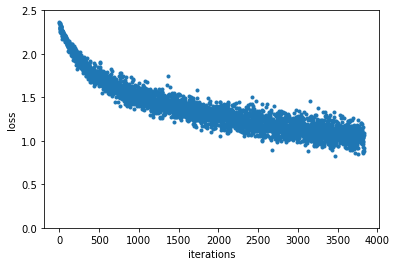

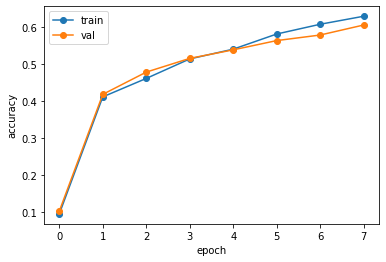

Best Validation Accuracy Achieved 60.50


In [ ]:
channel_1 = 16
channel_2 = 16
channel_3 = 64
channel_4 = 64
channel_5 = 128
channel_6 = 128

model2 = nn.Sequential(nn.Conv2d(3, channel_1, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_1),
                      nn.Conv2d(channel_1, channel_2, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_2), nn.MaxPool2d(2,2),
                      nn.Conv2d(channel_2, channel_3, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_3),
                      nn.Conv2d(channel_3, channel_4, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_4), nn.MaxPool2d(2,2),
                      nn.Conv2d(channel_4, channel_5, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_5),
                      nn.Conv2d(channel_5, channel_6, (3,3), stride = 1, padding = 0), nn.ReLU(), nn.BatchNorm2d(channel_6), nn.MaxPool2d(2,2),
                      Flatten(), nn.Linear(3*3*channel_6, 256), nn.ReLU(), nn.Linear(256, 10))

optimizer = optimizer = optim.SGD(model2.parameters(), lr = 1e-4, momentum = 0.9, nesterov = True)
train(model2, optimizer,epochs = 10, print_every = 500)

In [ ]:
print("Checking Validation accuracy")
acc = check(loader_val, model2, False)
print('Validation accuracy %0.2f'%(100*acc))
print()
print("Checking Training accuracy")
acc = check(loader_train, model2, False)
print('Training accuracy %0.2f'%(100*acc))
print()

Checking Validation accuracy
Got 609 correct out of 1000
Validation accuracy 60.90

Checking Training accuracy
Got 31402 correct out of 49000
Training accuracy 64.09



iteration : 0, loss : 2.4580
Got 78 correct out of 1000
Got 392 correct out of 3840
Validation Accuracy : 7.80, Training Accuracy : 10.21

iteration : 100, loss : 1.5473
Got 392 correct out of 1000
Got 1482 correct out of 3840
Validation Accuracy : 39.20, Training Accuracy : 38.59

iteration : 200, loss : 1.3974
Got 475 correct out of 1000
Got 1758 correct out of 3840
Validation Accuracy : 47.50, Training Accuracy : 45.78

iteration : 300, loss : 1.3826
Got 448 correct out of 1000
Got 1695 correct out of 3840
Validation Accuracy : 44.80, Training Accuracy : 44.14

iteration : 400, loss : 1.2670
Got 555 correct out of 1000
Got 2203 correct out of 3840
Validation Accuracy : 55.50, Training Accuracy : 57.37

iteration : 500, loss : 1.0594
Got 598 correct out of 1000
Got 2289 correct out of 3840
Validation Accuracy : 59.80, Training Accuracy : 59.61

iteration : 600, loss : 0.8912
Got 618 correct out of 1000
Got 2428 correct out of 3840
Validation Accuracy : 61.80, Training Accuracy : 63.2

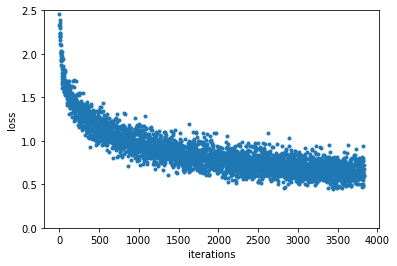

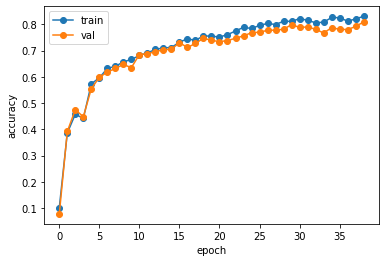

Best Validation Accuracy Achieved 80.90


In [ ]:
channel_1 = 16
channel_2 = 16
channel_3 = 64
channel_4 = 64
channel_5 = 128
channel_6 = 128

model3 = nn.Sequential(nn.Conv2d(3, channel_1, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_1),
                      nn.Conv2d(channel_1, channel_2, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_2), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_2, channel_3, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_3),
                      nn.Conv2d(channel_3, channel_4, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_4), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_4, channel_5, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_5),
                      nn.Conv2d(channel_5, channel_6, (3,3), stride = 1, padding = 0), nn.ReLU(), nn.BatchNorm2d(channel_6), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      Flatten(), nn.Linear(3*3*channel_6, 256), nn.ReLU(), nn.Linear(256, 10))

optimizer = optim.SGD(model3.parameters(), lr = 1e-2, momentum = 0.9, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 100)

In [ ]:
print("Checking Validation accuracy")
acc = check(loader_val, model3, False)
print('Validation accuracy %0.2f'%(100*acc))
print()
print("Checking Training accuracy")
acc = check(loader_train, model3, False)
print('Training accuracy %0.2f'%(100*acc))
print()

Checking Validation accuracy
Got 801 correct out of 1000
Validation accuracy 80.10

Checking Training accuracy
Got 40839 correct out of 49000
Training accuracy 83.34



iteration : 0, loss : 0.6125
Got 803 correct out of 1000
Got 3209 correct out of 3840
Validation Accuracy : 80.30, Training Accuracy : 83.57

iteration : 500, loss : 0.5083
Got 819 correct out of 1000
Got 3258 correct out of 3840
Validation Accuracy : 81.90, Training Accuracy : 84.84

iteration : 1000, loss : 0.4455
Got 824 correct out of 1000
Got 3292 correct out of 3840
Validation Accuracy : 82.40, Training Accuracy : 85.73

iteration : 1500, loss : 0.7468
Got 822 correct out of 1000
Got 3293 correct out of 3840
Validation Accuracy : 82.20, Training Accuracy : 85.76

iteration : 2000, loss : 0.5624
Got 820 correct out of 1000
Got 3307 correct out of 3840
Validation Accuracy : 82.00, Training Accuracy : 86.12

iteration : 2500, loss : 0.5216
Got 823 correct out of 1000
Got 3354 correct out of 3840
Validation Accuracy : 82.30, Training Accuracy : 87.34

iteration : 3000, loss : 0.5086
Got 826 correct out of 1000
Got 3350 correct out of 3840
Validation Accuracy : 82.60, Training Accurac

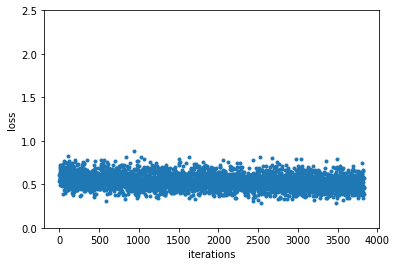

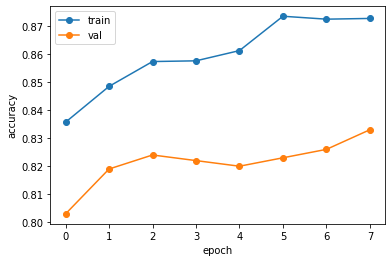

Best Validation Accuracy Achieved 83.30


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-3, momentum = 0.9, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 500)

iteration : 0, loss : 0.6295
Got 826 correct out of 1000
Got 3327 correct out of 3840
Validation Accuracy : 82.60, Training Accuracy : 86.64

iteration : 500, loss : 0.4889
Got 833 correct out of 1000
Got 3332 correct out of 3840
Validation Accuracy : 83.30, Training Accuracy : 86.77

iteration : 1000, loss : 0.6443
Got 834 correct out of 1000
Got 3360 correct out of 3840
Validation Accuracy : 83.40, Training Accuracy : 87.50

iteration : 1500, loss : 0.4501
Got 831 correct out of 1000
Got 3330 correct out of 3840
Validation Accuracy : 83.10, Training Accuracy : 86.72

iteration : 2000, loss : 0.5070
Got 831 correct out of 1000
Got 3380 correct out of 3840
Validation Accuracy : 83.10, Training Accuracy : 88.02

iteration : 2500, loss : 0.4587
Got 834 correct out of 1000
Got 3344 correct out of 3840
Validation Accuracy : 83.40, Training Accuracy : 87.08

iteration : 3000, loss : 0.4030
Got 834 correct out of 1000
Got 3357 correct out of 3840
Validation Accuracy : 83.40, Training Accurac

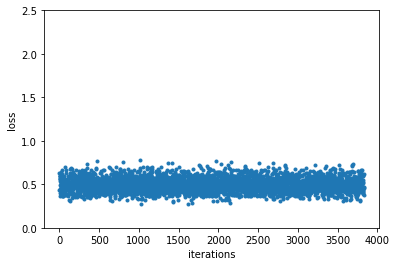

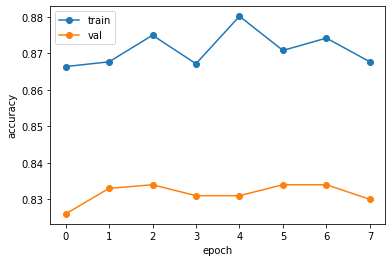

Best Validation Accuracy Achieved 83.40


In [ ]:
 optimizer = optim.SGD(model3.parameters(), lr = 1e-4, momentum = 0.9, nesterov = True, weight_decay = 5e-5)
train(model3, optimizer, epochs = 10, print_every = 500)

iteration : 0, loss : 0.4683
Got 831 correct out of 1000
Got 3379 correct out of 3840
Validation Accuracy : 83.10, Training Accuracy : 87.99

iteration : 100, loss : 0.4349
Got 835 correct out of 1000
Got 3367 correct out of 3840
Validation Accuracy : 83.50, Training Accuracy : 87.68

iteration : 200, loss : 0.4669
Got 830 correct out of 1000
Got 3373 correct out of 3840
Validation Accuracy : 83.00, Training Accuracy : 87.84

iteration : 300, loss : 0.5105
Got 832 correct out of 1000
Got 3359 correct out of 3840
Validation Accuracy : 83.20, Training Accuracy : 87.47

iteration : 400, loss : 0.6185
Got 834 correct out of 1000
Got 3360 correct out of 3840
Validation Accuracy : 83.40, Training Accuracy : 87.50

iteration : 500, loss : 0.4154
Got 831 correct out of 1000
Got 3321 correct out of 3840
Validation Accuracy : 83.10, Training Accuracy : 86.48

iteration : 600, loss : 0.4137
Got 834 correct out of 1000
Got 3349 correct out of 3840
Validation Accuracy : 83.40, Training Accuracy : 8

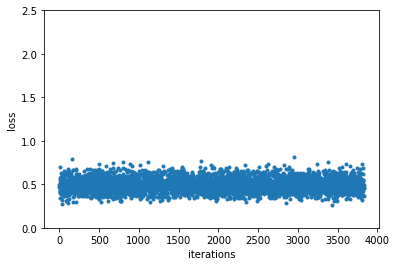

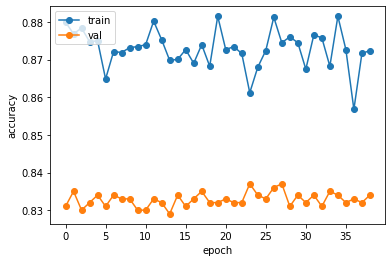

Best Validation Accuracy Achieved 83.70


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-5, momentum = 0.8, nesterov = True, weight_decay = 5e-5)
train(model3, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.6443
Got 834 correct out of 1000
Got 3334 correct out of 3840
Validation Accuracy : 83.40, Training Accuracy : 86.82

iteration : 100, loss : 0.5106
Got 833 correct out of 1000
Got 3366 correct out of 3840
Validation Accuracy : 83.30, Training Accuracy : 87.66

iteration : 200, loss : 0.6183
Got 833 correct out of 1000
Got 3342 correct out of 3840
Validation Accuracy : 83.30, Training Accuracy : 87.03

iteration : 300, loss : 0.5097
Got 832 correct out of 1000
Got 3331 correct out of 3840
Validation Accuracy : 83.20, Training Accuracy : 86.74

iteration : 400, loss : 0.4326
Got 837 correct out of 1000
Got 3382 correct out of 3840
Validation Accuracy : 83.70, Training Accuracy : 88.07

iteration : 500, loss : 0.4738
Got 830 correct out of 1000
Got 3369 correct out of 3840
Validation Accuracy : 83.00, Training Accuracy : 87.73

iteration : 600, loss : 0.5188
Got 833 correct out of 1000
Got 3327 correct out of 3840
Validation Accuracy : 83.30, Training Accuracy : 8

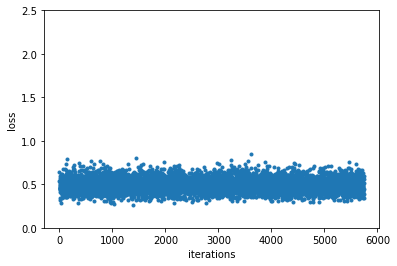

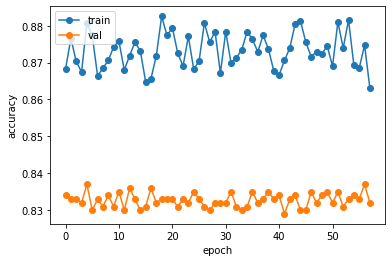

Best Validation Accuracy Achieved 83.70


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-6, momentum = 0.8, nesterov = True, weight_decay = 5e-5)
train(model3, optimizer, epochs = 15, print_every = 100)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
iteration : 0, loss : 2.4061
Got 98 correct out of 1000
Got 365 correct out of 3840
Validation Accuracy : 9.80, Training Accuracy : 9.51

iteration : 100, loss : 1.5295
Got 418 correct out of 1000
Got 1574 correct out of 3840
Validation Accuracy : 41.80, Training Accuracy : 40.99

iteration : 200, loss : 1.3564
Got 430 correct out of 1000
Got 1616 correct out of 3840
Validation Accuracy : 43.00, Training Accuracy : 42.08

iteration : 300, loss : 1.5780
Got 432 correct out of 1000
Got 1571 correct out of 3840
Validation Accuracy : 43.20, Training Accuracy : 40.91

iteration : 400, loss : 1.2426
Got 513 correct out of 1000
Got 1859 correct out of 3840
Validation Accuracy : 51.30, Training Accuracy : 48.41

iteration : 500, loss : 1.4091
Got 527 correct out of 1000
Got 1977 correct out of 3840
Validation Accuracy : 52.70, Training Accuracy : 51.48

iteration : 600, loss : 1.26

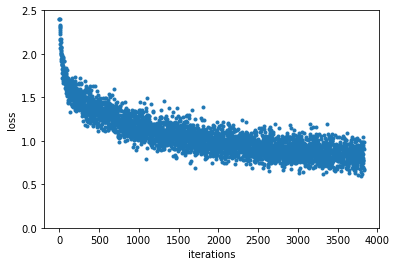

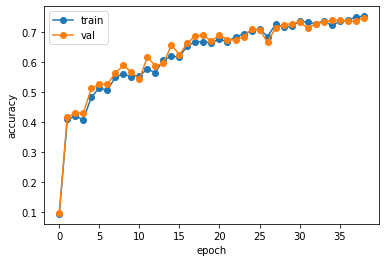

Best Validation Accuracy Achieved 74.80


In [ ]:
Num_Train = 49000

transform = T.Compose([
                T.ColorJitter(hue=.05, saturation=.05),
                T.RandomHorizontalFlip(),
                T.RandomRotation(20, resample=PIL.Image.BILINEAR),
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])

cifar10_train = dset.CIFAR10('./cs231n/datasets', train = True, transform = transform, download = True)
loader_train = DataLoader(cifar10_train, batch_size = 128, sampler = sampler.SubsetRandomSampler(range(Num_Train)))

cifar10_val = dset.CIFAR10('./cs231n/datasets', train=True, download=True, transform=transform)
loader_val = DataLoader(cifar10_val, batch_size = 128, sampler=sampler.SubsetRandomSampler(range(Num_Train, 50000)))

cifar10_test = dset.CIFAR10('./cs231n/datasets', train=False, download=True, transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=128)

channel_1 = 16
channel_2 = 16
channel_3 = 64
channel_4 = 64
channel_5 = 128
channel_6 = 128

model3 = nn.Sequential(nn.Conv2d(3, channel_1, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_1),
                      nn.Conv2d(channel_1, channel_2, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_2), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_2, channel_3, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_3),
                      nn.Conv2d(channel_3, channel_4, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_4), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_4, channel_5, (3,3), stride = 1, padding = 1), nn.ReLU(), nn.BatchNorm2d(channel_5),
                      nn.Conv2d(channel_5, channel_6, (3,3), stride = 1, padding = 0), nn.ReLU(), nn.BatchNorm2d(channel_6), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      Flatten(), nn.Linear(3*3*channel_6, 256), nn.ReLU(), nn.Linear(256, 10))

optimizer = optim.SGD(model3.parameters(), lr = 1e-2, momentum = 0.9, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.8720
Got 752 correct out of 1000
Got 2870 correct out of 3840
Validation Accuracy : 75.20, Training Accuracy : 74.74

iteration : 100, loss : 0.6448
Got 759 correct out of 1000
Got 2916 correct out of 3840
Validation Accuracy : 75.90, Training Accuracy : 75.94

iteration : 200, loss : 0.5678
Got 765 correct out of 1000
Got 2920 correct out of 3840
Validation Accuracy : 76.50, Training Accuracy : 76.04

iteration : 300, loss : 0.5819
Got 758 correct out of 1000
Got 2915 correct out of 3840
Validation Accuracy : 75.80, Training Accuracy : 75.91

iteration : 400, loss : 0.6713
Got 765 correct out of 1000
Got 2952 correct out of 3840
Validation Accuracy : 76.50, Training Accuracy : 76.88

iteration : 500, loss : 0.8828
Got 759 correct out of 1000
Got 2946 correct out of 3840
Validation Accuracy : 75.90, Training Accuracy : 76.72

iteration : 600, loss : 0.7574
Got 765 correct out of 1000
Got 2939 correct out of 3840
Validation Accuracy : 76.50, Training Accuracy : 7

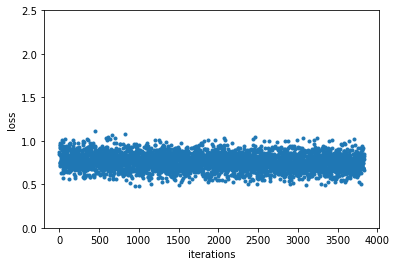

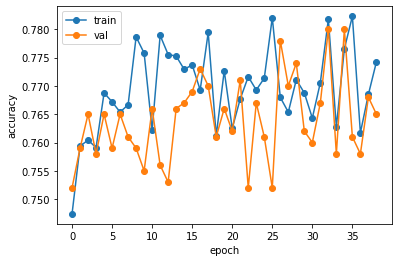

Best Validation Accuracy Achieved 78.00


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 5e-4, momentum = 0.85, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.6549
Got 762 correct out of 1000
Got 2948 correct out of 3840
Validation Accuracy : 76.20, Training Accuracy : 76.77

iteration : 500, loss : 0.7108
Got 773 correct out of 1000
Got 2947 correct out of 3840
Validation Accuracy : 77.30, Training Accuracy : 76.74

iteration : 1000, loss : 0.9364
Got 759 correct out of 1000
Got 2959 correct out of 3840
Validation Accuracy : 75.90, Training Accuracy : 77.06

iteration : 1500, loss : 0.8456
Got 763 correct out of 1000
Got 2952 correct out of 3840
Validation Accuracy : 76.30, Training Accuracy : 76.88

iteration : 2000, loss : 0.7514
Got 762 correct out of 1000
Got 2951 correct out of 3840
Validation Accuracy : 76.20, Training Accuracy : 76.85

iteration : 2500, loss : 0.7180
Got 767 correct out of 1000
Got 2985 correct out of 3840
Validation Accuracy : 76.70, Training Accuracy : 77.73

iteration : 3000, loss : 0.6040
Got 762 correct out of 1000
Got 2990 correct out of 3840
Validation Accuracy : 76.20, Training Accurac

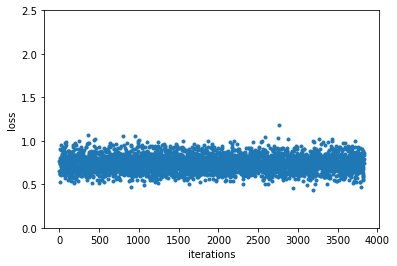

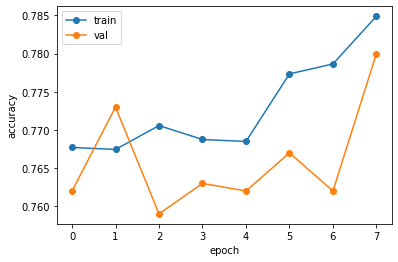

Best Validation Accuracy Achieved 78.00


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-4, momentum = 0.80, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 500)

In [ ]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-2, momentum = 0.80, nesterov = True)
train(model3, optimizer, epochs = 10, print_every = 500)

iteration : 0, loss : 0.7876
Got 757 correct out of 1000
Got 2974 correct out of 3840
Validation Accuracy : 75.70, Training Accuracy : 77.45

iteration : 500, loss : 0.8959
Got 771 correct out of 1000
Got 2924 correct out of 3840
Validation Accuracy : 77.10, Training Accuracy : 76.15

iteration : 1000, loss : 0.8170
Got 763 correct out of 1000
Got 2945 correct out of 3840
Validation Accuracy : 76.30, Training Accuracy : 76.69



iteration : 0, loss : 2.4979
Got 119 correct out of 1000
Got 402 correct out of 3840
Validation Accuracy : 11.90, Training Accuracy : 10.47

iteration : 100, loss : 1.5079
Got 412 correct out of 1000
Got 1470 correct out of 3840
Validation Accuracy : 41.20, Training Accuracy : 38.28

iteration : 200, loss : 1.4792
Got 447 correct out of 1000
Got 1683 correct out of 3840
Validation Accuracy : 44.70, Training Accuracy : 43.83

iteration : 300, loss : 1.4403
Got 461 correct out of 1000
Got 1788 correct out of 3840
Validation Accuracy : 46.10, Training Accuracy : 46.56

iteration : 400, loss : 1.1848
Got 521 correct out of 1000
Got 1942 correct out of 3840
Validation Accuracy : 52.10, Training Accuracy : 50.57

iteration : 500, loss : 0.9781
Got 595 correct out of 1000
Got 2173 correct out of 3840
Validation Accuracy : 59.50, Training Accuracy : 56.59

iteration : 600, loss : 1.0683
Got 596 correct out of 1000
Got 2352 correct out of 3840
Validation Accuracy : 59.60, Training Accuracy : 61

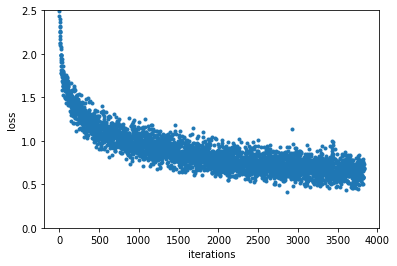

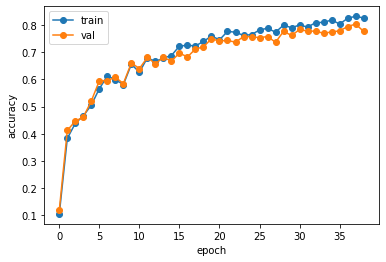

Best Validation Accuracy Achieved 80.40


In [ ]:
channel_1 = 16
channel_2 = 16
channel_3 = 64
channel_4 = 64
channel_5 = 128
channel_6 = 128

model4 = nn.Sequential(nn.Conv2d(3, channel_1, (3,3), stride = 1, padding = 1), nn.LeakyReLU(), nn.BatchNorm2d(channel_1),
                      nn.Conv2d(channel_1, channel_2, (3,3), stride = 1, padding = 1), nn.LeakyReLU(), nn.BatchNorm2d(channel_2), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_2, channel_3, (3,3), stride = 1, padding = 1), nn.LeakyReLU(), nn.BatchNorm2d(channel_3),
                      nn.Conv2d(channel_3, channel_4, (3,3), stride = 1, padding = 1), nn.LeakyReLU(), nn.BatchNorm2d(channel_4), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      nn.Conv2d(channel_4, channel_5, (3,3), stride = 1, padding = 1), nn.LeakyReLU(), nn.BatchNorm2d(channel_5),
                      nn.Conv2d(channel_5, channel_6, (3,3), stride = 1, padding = 0), nn.LeakyReLU(), nn.BatchNorm2d(channel_6), nn.MaxPool2d(2,2), nn.Dropout(p = 0.5),
                      Flatten(), nn.Linear(3*3*channel_6, 256), nn.ReLU(), nn.Linear(256, 10))

optimizer = optim.SGD(model4.parameters(), lr = 1e-2, momentum = 0.9, nesterov = True)
train(model4, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.7096
Got 784 correct out of 1000
Got 3223 correct out of 3840
Validation Accuracy : 78.40, Training Accuracy : 83.93

iteration : 100, loss : 0.7240
Got 798 correct out of 1000
Got 3184 correct out of 3840
Validation Accuracy : 79.80, Training Accuracy : 82.92

iteration : 200, loss : 0.6236
Got 807 correct out of 1000
Got 3232 correct out of 3840
Validation Accuracy : 80.70, Training Accuracy : 84.17

iteration : 300, loss : 0.5896
Got 797 correct out of 1000
Got 3225 correct out of 3840
Validation Accuracy : 79.70, Training Accuracy : 83.98

iteration : 400, loss : 0.5631
Got 798 correct out of 1000
Got 3223 correct out of 3840
Validation Accuracy : 79.80, Training Accuracy : 83.93

iteration : 500, loss : 0.5015
Got 802 correct out of 1000
Got 3225 correct out of 3840
Validation Accuracy : 80.20, Training Accuracy : 83.98

iteration : 600, loss : 0.6333
Got 791 correct out of 1000
Got 3226 correct out of 3840
Validation Accuracy : 79.10, Training Accuracy : 8

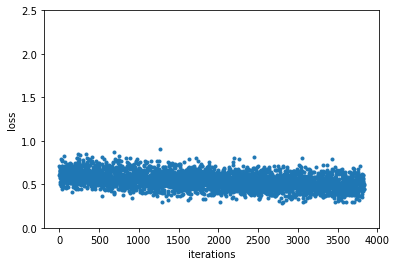

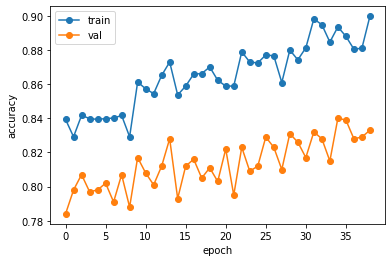

Best Validation Accuracy Achieved 84.00


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 7e-3, momentum = 0.9, nesterov = True)
train(model4, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.5113
Got 813 correct out of 1000
Got 3392 correct out of 3840
Validation Accuracy : 81.30, Training Accuracy : 88.33

iteration : 100, loss : 0.3347
Got 841 correct out of 1000
Got 3471 correct out of 3840
Validation Accuracy : 84.10, Training Accuracy : 90.39

iteration : 200, loss : 0.5053
Got 845 correct out of 1000
Got 3500 correct out of 3840
Validation Accuracy : 84.50, Training Accuracy : 91.15

iteration : 300, loss : 0.3924
Got 831 correct out of 1000
Got 3461 correct out of 3840
Validation Accuracy : 83.10, Training Accuracy : 90.13

iteration : 400, loss : 0.4936
Got 838 correct out of 1000
Got 3490 correct out of 3840
Validation Accuracy : 83.80, Training Accuracy : 90.89

iteration : 500, loss : 0.3529
Got 835 correct out of 1000
Got 3489 correct out of 3840
Validation Accuracy : 83.50, Training Accuracy : 90.86

iteration : 600, loss : 0.3253
Got 842 correct out of 1000
Got 3484 correct out of 3840
Validation Accuracy : 84.20, Training Accuracy : 9

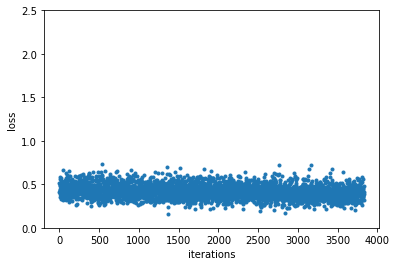

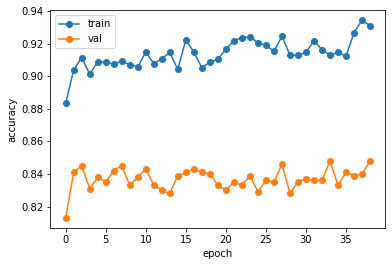

Best Validation Accuracy Achieved 84.80


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 4e-3, momentum = 0.86, nesterov = True)
train(model4, optimizer, epochs = 10, print_every = 100)

iteration : 0, loss : 0.3083
Got 840 correct out of 1000
Got 3543 correct out of 3840
Validation Accuracy : 84.00, Training Accuracy : 92.27

iteration : 100, loss : 0.4002
Got 833 correct out of 1000
Got 3574 correct out of 3840
Validation Accuracy : 83.30, Training Accuracy : 93.07

iteration : 200, loss : 0.3318
Got 839 correct out of 1000
Got 3579 correct out of 3840
Validation Accuracy : 83.90, Training Accuracy : 93.20

iteration : 300, loss : 0.4417
Got 840 correct out of 1000
Got 3560 correct out of 3840
Validation Accuracy : 84.00, Training Accuracy : 92.71

iteration : 400, loss : 0.4900
Got 842 correct out of 1000
Got 3568 correct out of 3840
Validation Accuracy : 84.20, Training Accuracy : 92.92

iteration : 500, loss : 0.2773
Got 836 correct out of 1000
Got 3568 correct out of 3840
Validation Accuracy : 83.60, Training Accuracy : 92.92

iteration : 600, loss : 0.3162
Got 839 correct out of 1000
Got 3580 correct out of 3840
Validation Accuracy : 83.90, Training Accuracy : 9

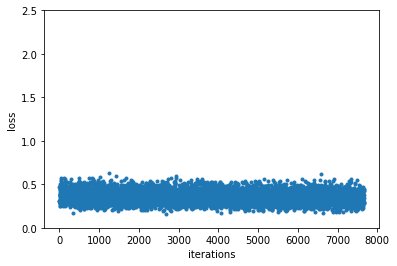

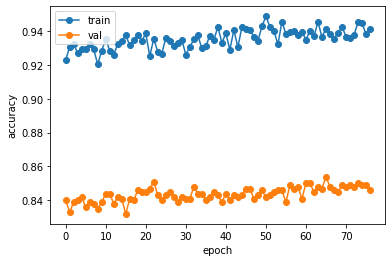

Best Validation Accuracy Achieved 85.40


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 1e-3, momentum = 0.82, nesterov = True)
train(model4, optimizer, epochs = 20, print_every = 100)

iteration : 0, loss : 0.3166
Got 848 correct out of 1000
Got 3605 correct out of 3840
Validation Accuracy : 84.80, Training Accuracy : 93.88

iteration : 100, loss : 0.3720
Got 850 correct out of 1000
Got 3597 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 93.67

iteration : 200, loss : 0.3136
Got 849 correct out of 1000
Got 3607 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 93.93

iteration : 300, loss : 0.4382
Got 846 correct out of 1000
Got 3605 correct out of 3840
Validation Accuracy : 84.60, Training Accuracy : 93.88

iteration : 400, loss : 0.2764
Got 847 correct out of 1000
Got 3620 correct out of 3840
Validation Accuracy : 84.70, Training Accuracy : 94.27

iteration : 500, loss : 0.4219
Got 850 correct out of 1000
Got 3605 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 93.88

iteration : 600, loss : 0.4093
Got 846 correct out of 1000
Got 3618 correct out of 3840
Validation Accuracy : 84.60, Training Accuracy : 9

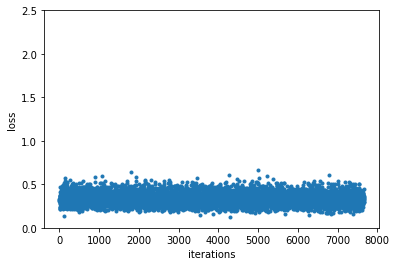

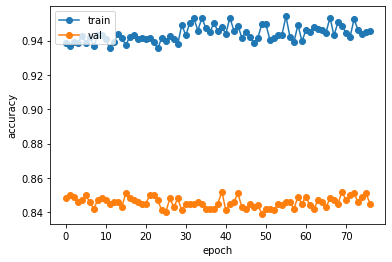

Best Validation Accuracy Achieved 85.20


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 7e-4, momentum = 0.76, nesterov = True)
train(model4, optimizer, epochs = 20, print_every = 100)

iteration : 0, loss : 0.4463
Got 850 correct out of 1000
Got 3639 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 94.77

iteration : 100, loss : 0.3828
Got 849 correct out of 1000
Got 3624 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.38

iteration : 200, loss : 0.3974
Got 850 correct out of 1000
Got 3644 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 94.90

iteration : 300, loss : 0.3072
Got 849 correct out of 1000
Got 3653 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 95.13

iteration : 400, loss : 0.3132
Got 852 correct out of 1000
Got 3629 correct out of 3840
Validation Accuracy : 85.20, Training Accuracy : 94.51

iteration : 500, loss : 0.3985
Got 849 correct out of 1000
Got 3635 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.66

iteration : 600, loss : 0.3529
Got 846 correct out of 1000
Got 3598 correct out of 3840
Validation Accuracy : 84.60, Training Accuracy : 9

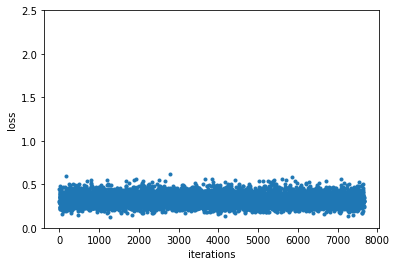

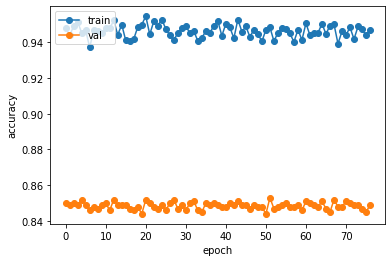

Best Validation Accuracy Achieved 85.30


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 1e-4, momentum = 0.70, nesterov = True)
train(model4, optimizer, epochs = 20, print_every = 100)

iteration : 0, loss : 0.3874
Got 847 correct out of 1000
Got 3628 correct out of 3840
Validation Accuracy : 84.70, Training Accuracy : 94.48

iteration : 100, loss : 0.2248
Got 850 correct out of 1000
Got 3616 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 94.17

iteration : 200, loss : 0.3784
Got 847 correct out of 1000
Got 3631 correct out of 3840
Validation Accuracy : 84.70, Training Accuracy : 94.56

iteration : 300, loss : 0.3883
Got 850 correct out of 1000
Got 3635 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 94.66

iteration : 400, loss : 0.2996
Got 846 correct out of 1000
Got 3633 correct out of 3840
Validation Accuracy : 84.60, Training Accuracy : 94.61

iteration : 500, loss : 0.2792
Got 851 correct out of 1000
Got 3664 correct out of 3840
Validation Accuracy : 85.10, Training Accuracy : 95.42

iteration : 600, loss : 0.3603
Got 849 correct out of 1000
Got 3648 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 9

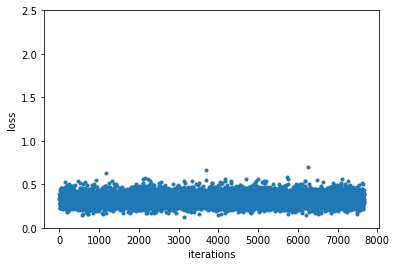

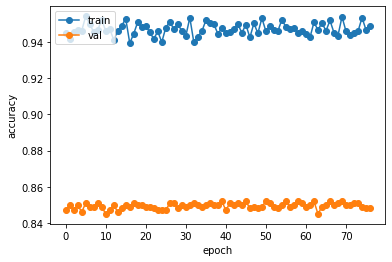

Best Validation Accuracy Achieved 85.20


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 1e-4, momentum = 0.70, nesterov = True, weight_decay=5e-6)
train(model4, optimizer, epochs = 20, print_every = 100)

iteration : 0, loss : 0.2401
Got 851 correct out of 1000
Got 3651 correct out of 3840
Validation Accuracy : 85.10, Training Accuracy : 95.08

iteration : 100, loss : 0.2538
Got 850 correct out of 1000
Got 3641 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 94.82

iteration : 200, loss : 0.2717
Got 849 correct out of 1000
Got 3650 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 95.05

iteration : 300, loss : 0.2824
Got 849 correct out of 1000
Got 3636 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.69

iteration : 400, loss : 0.1868
Got 849 correct out of 1000
Got 3624 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.38

iteration : 500, loss : 0.3413
Got 849 correct out of 1000
Got 3635 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.66

iteration : 600, loss : 0.2382
Got 847 correct out of 1000
Got 3586 correct out of 3840
Validation Accuracy : 84.70, Training Accuracy : 9

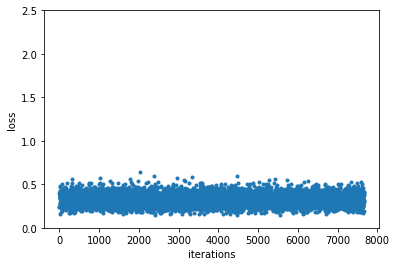

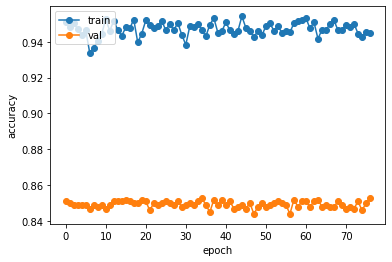

Best Validation Accuracy Achieved 85.30


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 5e-5, momentum = 0.65, nesterov = True, weight_decay=5e-5)
train(model4, optimizer, epochs = 20, print_every = 100)

iteration : 0, loss : 0.4392
Got 852 correct out of 1000
Got 3634 correct out of 3840
Validation Accuracy : 85.20, Training Accuracy : 94.64

iteration : 100, loss : 0.3743
Got 849 correct out of 1000
Got 3644 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.90

iteration : 200, loss : 0.2262
Got 854 correct out of 1000
Got 3626 correct out of 3840
Validation Accuracy : 85.40, Training Accuracy : 94.43

iteration : 300, loss : 0.3191
Got 847 correct out of 1000
Got 3640 correct out of 3840
Validation Accuracy : 84.70, Training Accuracy : 94.79

iteration : 400, loss : 0.2898
Got 849 correct out of 1000
Got 3662 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 95.36

iteration : 500, loss : 0.2981
Got 849 correct out of 1000
Got 3631 correct out of 3840
Validation Accuracy : 84.90, Training Accuracy : 94.56

iteration : 600, loss : 0.3309
Got 850 correct out of 1000
Got 3635 correct out of 3840
Validation Accuracy : 85.00, Training Accuracy : 9

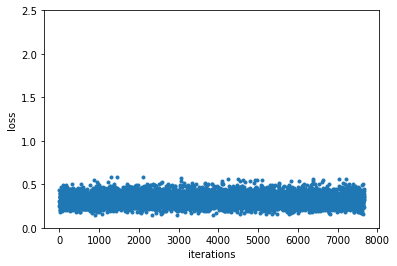

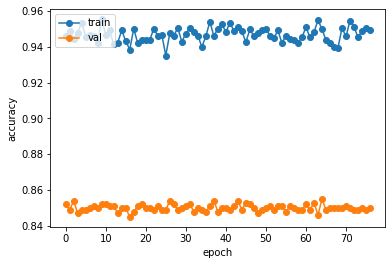

Best Validation Accuracy Achieved 85.50


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr = 1e-6, momentum = 0.65, nesterov = True, weight_decay=5e-5)
train(model4, optimizer, epochs = 20, print_every = 100)

In [ ]:
check(loader_test, model4, verbose = False)

Got 8408 correct out of 10000


0.8408